In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

In [6]:
X_scaled = standardScaler.fit_transform(df)

#### Apply PCA: combining features in to less features

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) ## convert the features into two features

In [8]:
pca_scaled = pca.fit_transform(X_scaled)

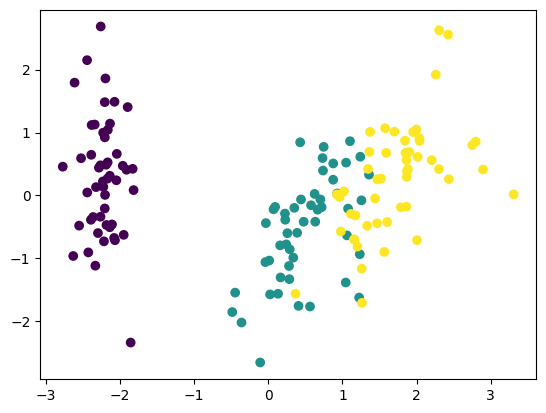

In [10]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1], c=iris.target)

#### Agglomerative Clustering
#### To construct a dendogram

Text(0, 0.5, 'Eucledian Distance')

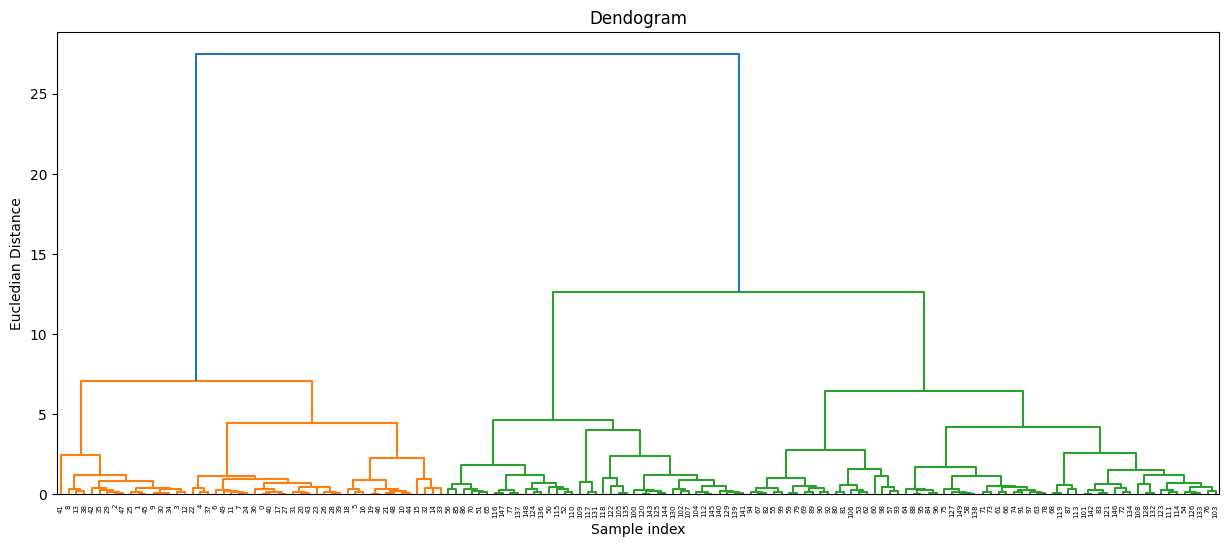

In [11]:
import scipy.cluster.hierarchy as sc

## plot the dendogram
plt.figure(figsize=(15,6))
plt.title("Dendogram")


## create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))

plt.xlabel("Sample index")
plt.ylabel("Eucledian Distance")

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [15]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

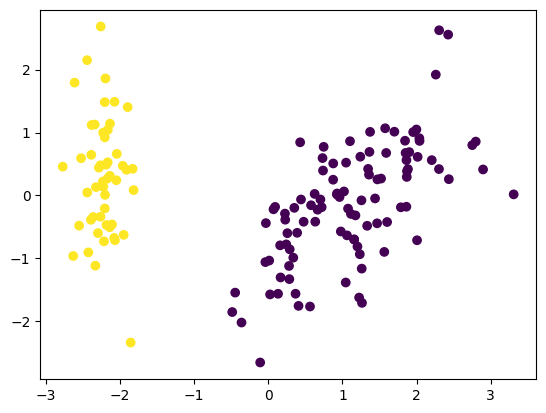

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1], c=cluster.labels_)